In [89]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

dp = pd.read_csv("blinkit_data.csv", encoding="ISO-8859-1")
dp.head(10)

,order_id,customer_id,order_date,order_total,payment_method,store_id,customer_name,email,phone,address,area,pincode,customer_segment,total_orders,avg_order_value,season,Day Name,weeday_flag
0,7164827734,9195970,16-03-2023 08:10,1809.72,UPI,4711,Riya Uppal,sunderabhimanyu@example.com,9.174530e+11,"85/83, Jaggi Road, Jalandhar 841040",Karawal Nagar,785030,New,14,517.58,Summer,Thursday,0
1,4028266143,19216141,16-03-2023 08:31,616.45,Card,4198,Teerth Manda,ksinghal@example.org,9.120440e+11,"069\nPatil Road, Tinsukia-750405",Giridih,829446,Premium,9,1428.54,Summer,Thursday,0
2,4376524554,72576730,16-03-2023 09:09,2512.22,Card,7687,Girik Kala,sarthak86@example.net,9.146030e+11,"61/029, Dara Street\nJaunpur-721683",Chennai,734650,Regular,5,1971.67,Summer,Thursday,0
3,208989475,94713625,16-03-2023 11:38,2973.06,Cash,5189,Samar Deol,davesathvik@example.com,9.157100e+11,H.No. 98\nRoy Road\nJhansi 989608,Barasat,284684,Premium,10,1791.16,Summer,Thursday,0
4,757816226,22571994,16-03-2023 14:07,1308.05,Wallet,3870,Lakshit Bassi,badamivrishti@example.net,9.100360e+11,"24, Bail Street\nJammu-808344",Bihar Sharif,83717,Regular,2,912.90,Summer,Thursday,0
5,168180571,89910157,16-03-2023 14:50,563.45,Cash,6130,Dayamai Ray,jdate@example.com,9.126550e+11,"775, Nayak Street, Patna-218169",Khandwa,166001,New,5,1859.93,Summer,Thursday,0
6,8469170680,5901440,16-03-2023 18:55,39.65,UPI,1928,Faris Chopra,waida01@example.org,9.176030e+11,H.No. 50\nRastogi Path\nMehsana-686891,Sambhal,719965,Premium,8,761.17,Summer,Thursday,0
7,5627902734,69415494,16-03-2023 19:11,3265.08,UPI,1809,Yashvi Iyer,hkurian@example.net,9.137160e+11,"H.No. 952, Viswanathan Chowk\nOngole-121550",Rajkot,742368,New,9,706.67,Summer,Thursday,0
8,9653859166,32987624,16-03-2023 19:23,2978.36,Wallet,1941,Dalaja Arora,calebsengupta@example.com,9.126720e+11,46/767\nChacko Chowk\nArrah 424009,Jabalpur,399897,Premium,15,902.61,Summer,Thursday,0
9,32613017,82594354,17-03-2023 00:20,2354.28,Card,3364,Harinakshi Sule,ocontractor@example.net,9.199870e+11,H.No. 608\nDhawan Ganj\nNizamabad 291392,Avadi,345071,Regular,7,321.80,Summer,Friday,0


In [90]:
dp.columns

Index(['order_id', 'customer_id', 'order_date', 'order_total',
       'payment_method', 'store_id', 'customer_name', 'email', 'phone',
       'address', 'area', 'pincode', 'customer_segment', 'total_orders',
       'avg_order_value', 'season', 'Day Name', 'weeday_flag'],
      dtype='object')

In [91]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          5000 non-null   int64  
 1   customer_id       5000 non-null   int64  
 2   order_date        5000 non-null   object 
 3   order_total       5000 non-null   float64
 4   payment_method    5000 non-null   object 
 5   store_id          5000 non-null   int64  
 6   customer_name     5000 non-null   object 
 7   email             5000 non-null   object 
 8   phone             5000 non-null   float64
 9   address           5000 non-null   object 
 10  area              5000 non-null   object 
 11  pincode           5000 non-null   int64  
 12  customer_segment  5000 non-null   object 
 13  total_orders      5000 non-null   int64  
 14  avg_order_value   5000 non-null   float64
 15  season            5000 non-null   object 
 16  Day Name          5000 non-null   object 


In [92]:
dp.shape

(5000, 18)

In [93]:
pd.isnull(dp).sum()

order_id            0
customer_id         0
order_date          0
order_total         0
payment_method      0
store_id            0
customer_name       0
email               0
phone               0
address             0
area                0
pincode             0
customer_segment    0
total_orders        0
avg_order_value     0
season              0
Day Name            0
weeday_flag         0
dtype: int64

In [73]:
dp.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [74]:
dp.dtypes

order_id              int64
customer_id           int64
order_date           object
order_total         float64
payment_method       object
store_id              int64
customer_name        object
email                object
phone               float64
address              object
area                 object
pincode               int64
customer_segment     object
total_orders          int64
avg_order_value     float64
season               object
Day Name             object
weeday_flag           int64
dtype: object

# Data Cleaning and Feature Engineering__

__Convert 'order_date' to datetime objects__

In [94]:
dp.columns

Index(['order_id', 'customer_id', 'order_date', 'order_total',
       'payment_method', 'store_id', 'customer_name', 'email', 'phone',
       'address', 'area', 'pincode', 'customer_segment', 'total_orders',
       'avg_order_value', 'season', 'Day Name', 'weeday_flag'],
      dtype='object')

In [95]:
dp["order_date"] = pd.to_datetime(dp["order_date"], errors="coerce", dayfirst=True)

__Sort the dataframe by date, which is crucial for time series analysis__

In [96]:
dp.sort_index(inplace=True)

In [97]:
dp.head(5)

,order_id,customer_id,order_date,order_total,payment_method,store_id,customer_name,email,phone,address,area,pincode,customer_segment,total_orders,avg_order_value,season,Day Name,weeday_flag
0,7164827734,9195970,2023-03-16 08:10:00,1809.72,UPI,4711,Riya Uppal,sunderabhimanyu@example.com,9.174530e+11,"85/83, Jaggi Road, Jalandhar 841040",Karawal Nagar,785030,New,14,517.58,Summer,Thursday,0
1,4028266143,19216141,2023-03-16 08:31:00,616.45,Card,4198,Teerth Manda,ksinghal@example.org,9.120440e+11,"069\nPatil Road, Tinsukia-750405",Giridih,829446,Premium,9,1428.54,Summer,Thursday,0
2,4376524554,72576730,2023-03-16 09:09:00,2512.22,Card,7687,Girik Kala,sarthak86@example.net,9.146030e+11,"61/029, Dara Street\nJaunpur-721683",Chennai,734650,Regular,5,1971.67,Summer,Thursday,0
3,208989475,94713625,2023-03-16 11:38:00,2973.06,Cash,5189,Samar Deol,davesathvik@example.com,9.157100e+11,H.No. 98\nRoy Road\nJhansi 989608,Barasat,284684,Premium,10,1791.16,Summer,Thursday,0
4,757816226,22571994,2023-03-16 14:07:00,1308.05,Wallet,3870,Lakshit Bassi,badamivrishti@example.net,9.100360e+11,"24, Bail Street\nJammu-808344",Bihar Sharif,83717,Regular,2,912.90,Summer,Thursday,0


# Exploratory Data Analysis (EDA)

__Resample data to daily frequency to see overall sales trends__

In [98]:
df = dp.set_index("order_date")
daily_sales = df["order_total"].resample("D").sum()

__Overall Daily Sales__

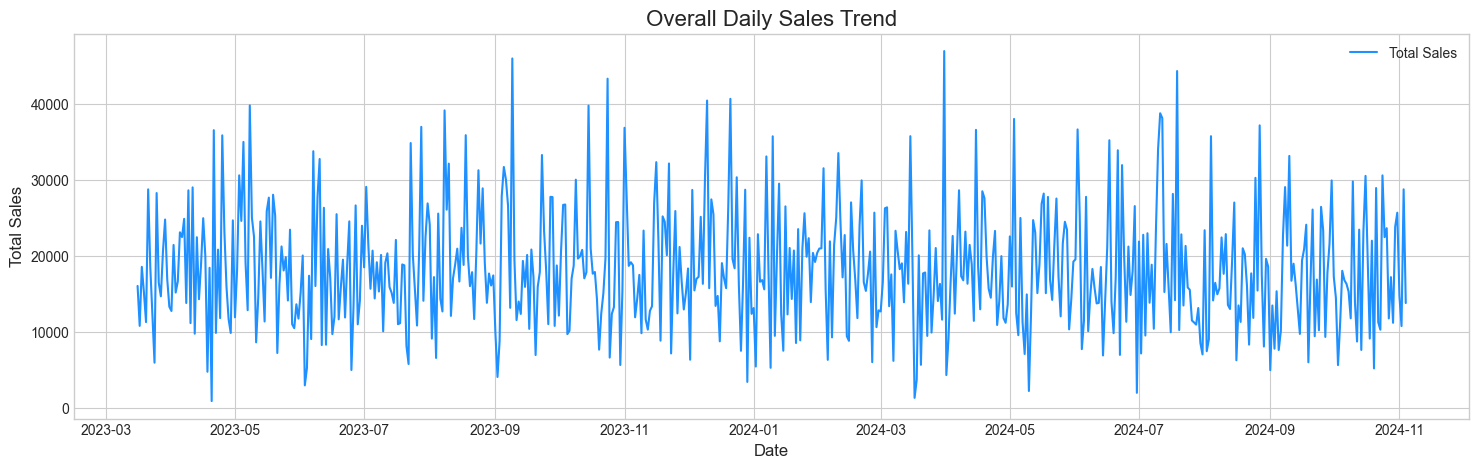

In [99]:
plt.figure(figsize = (18,5))
plt.plot(daily_sales, label = "Total Sales", color = "dodgerblue")
plt.title("Overall Daily Sales Trend", fontsize = 16)
plt.xlabel("Date", fontsize = 12)
plt.ylabel("Total Sales", fontsize = 12)
plt.legend()
plt.show()

__Area-wise Sales Analysis__

In [100]:
area_daily_sales = df.groupby("area")["order_total"].resample("D").sum().reset_index()
area_daily_sales = area_daily_sales.rename(columns ={"order_total" : "daily_total"})
print(area_daily_sales)

               area order_date  daily_total
0             Adoni 2023-04-06       888.12
1             Adoni 2023-04-07         0.00
2             Adoni 2023-04-08         0.00
3             Adoni 2023-04-09         0.00
4             Adoni 2023-04-10         0.00
...             ...        ...          ...
161117  Yamunanagar 2024-09-19         0.00
161118  Yamunanagar 2024-09-20         0.00
161119  Yamunanagar 2024-09-21         0.00
161120  Yamunanagar 2024-09-22         0.00
161121  Yamunanagar 2024-09-23      4080.28

[161122 rows x 3 columns]


__Aggregate Top 10 Area Daily Sales__

In [101]:
area_total_sales = (
    area_daily_sales.groupby("area")["daily_total"]
    .sum()
    .reset_index()
    .sort_values(by="daily_total", ascending=False)
)

top_10_areas = area_total_sales.head(10)["area"]

top_10_area_daily_sales = area_daily_sales[area_daily_sales["area"].isin(top_10_areas)]

print(top_10_area_daily_sales)


              area order_date  daily_total
2172    Ahmednagar 2023-03-26      1946.42
2173    Ahmednagar 2023-03-27         0.00
2174    Ahmednagar 2023-03-28         0.00
2175    Ahmednagar 2023-03-29         0.00
2176    Ahmednagar 2023-03-30       840.34
...            ...        ...          ...
127745      Ratlam 2024-10-20         0.00
127746      Ratlam 2024-10-21         0.00
127747      Ratlam 2024-10-22         0.00
127748      Ratlam 2024-10-23         0.00
127749      Ratlam 2024-10-24      1869.79

[5595 rows x 3 columns]


__Top 10 Areas Daily Sales Trend Chart__

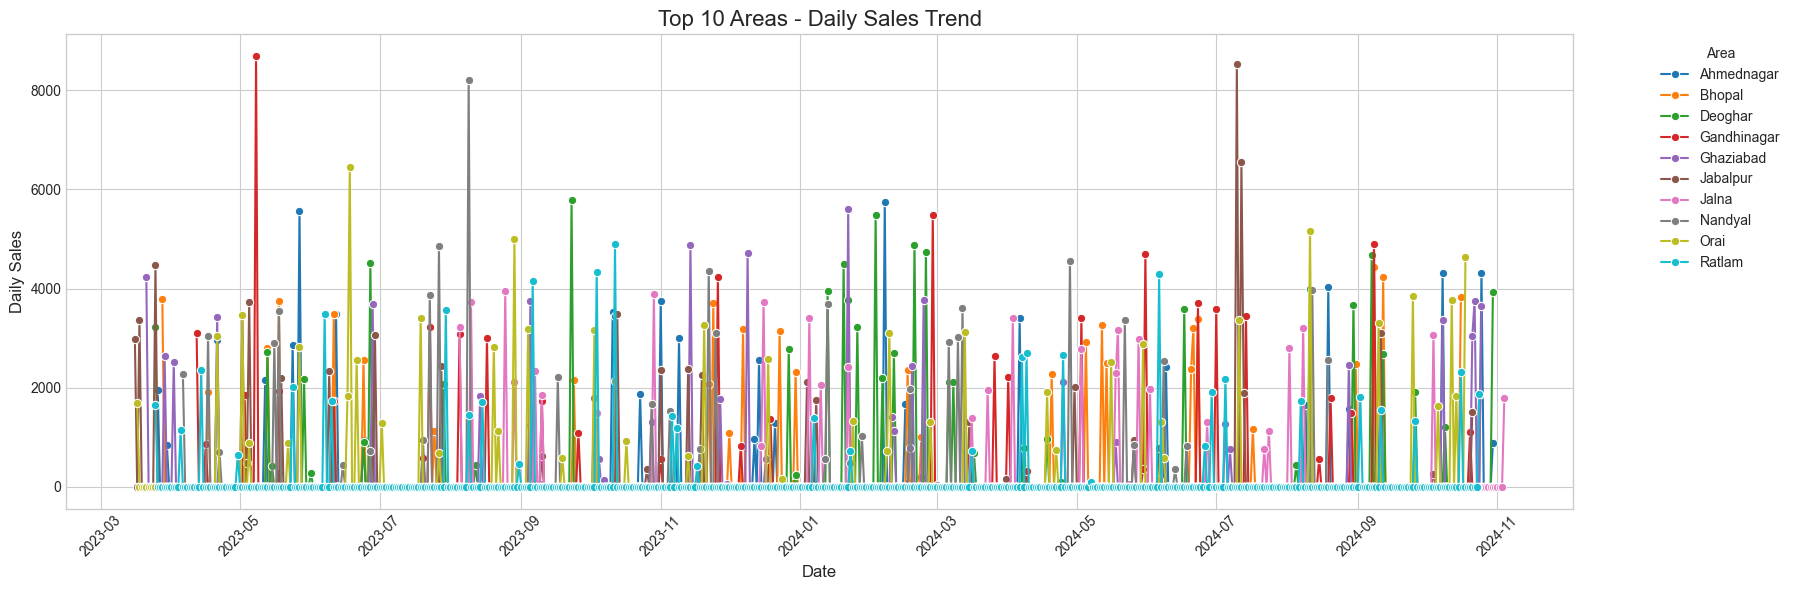

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))

sns.lineplot(
    data=top_10_area_daily_sales,
    x="order_date", 
    y="daily_total",
    hue="area",
    marker="o"
)

plt.title("Top 10 Areas - Daily Sales Trend", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Daily Sales", fontsize=12)
plt.legend(title="Area", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Use Prophet for the Retail Forecasting

__Load Data__

In [103]:
df = pd.read_csv("blinkit_data.csv", encoding="ISO-8859-1")

__Conver Date to Date Time__

In [ ]:
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce", dayfirst=True)

__Prophet requires 'ds' (date) and 'y' (value)__

In [ ]:
daily_sales = df.groupby("order_date")["order_total"].sum().reset_index()
daily_sales = daily_sales.rename(columns={"order_date": "ds", "order_total": "y"})

__Split into train (80%) and test (20%)__

In [106]:
train_size = int(len(daily_sales) * 0.8)
train = daily_sales.iloc[:train_size]
test = daily_sales.iloc[train_size:]


__Build & fit model on train data__

In [107]:
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.fit(train)

12:11:16 - cmdstanpy - INFO - Chain [1] start processing
12:11:19 - cmdstanpy - INFO - Chain [1] done processing


__Forecast for the test period__

In [108]:
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

__Extract only test period forecast__

In [109]:
forecast_test = forecast.iloc[-len(test):]

__Evaluate accuracy__

In [110]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_true = test["y"].values
y_pred = forecast.loc[test.index, "yhat"].values

mae = mean_absolute_error(y_true, y_pred)

rmse = np.sqrt(mean_squared_error(y_true, y_pred))

mask = y_true > 1500# demand > 10 ko consider karo
mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

smape = 100 * np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred) + 1e-8))

print("Model Accuracy Metrics")
print(f"MAE   : {mae:.2f}")
print(f"RMSE  : {rmse:.2f}")
print(f"MAPE  : {mape:.2f}%")
print(f"SMAPE : {smape:.2f}%")


Model Accuracy Metrics
MAE   : 1079.78
RMSE  : 1303.04
MAPE  : 28.69%
SMAPE : 55.16%


__Print Forecast Table__

In [112]:
print("\nSample Forecast:")
print(forecast_test[["ds", "yhat", "yhat_lower", "yhat_upper"]].head(10))


Sample Forecast:
                      ds         yhat  yhat_lower   yhat_upper
3984 2024-07-06 04:07:00  2178.152897  487.704485  3955.919717
3985 2024-07-07 04:07:00  2295.065403  463.388232  3821.452978
3986 2024-07-08 04:07:00  2204.182736  480.422854  3752.052038
3987 2024-07-09 04:07:00  2133.494460  457.809566  3896.188004
3988 2024-07-10 04:07:00  2146.748321  408.664424  3827.448106
3989 2024-07-11 04:07:00  2183.393952  550.282503  3758.513782
3990 2024-07-12 04:07:00  2171.401954  477.681169  3784.065689
3991 2024-07-13 04:07:00  2189.984786  599.308486  3859.895314
3992 2024-07-14 04:07:00  2310.251306  714.975060  4088.125159
3993 2024-07-15 04:07:00  2223.336939  613.702440  3918.606008


In [113]:
forecast_test[["ds", "yhat", "yhat_lower", "yhat_upper"]].to_csv("forecast_output.csv", index=False)


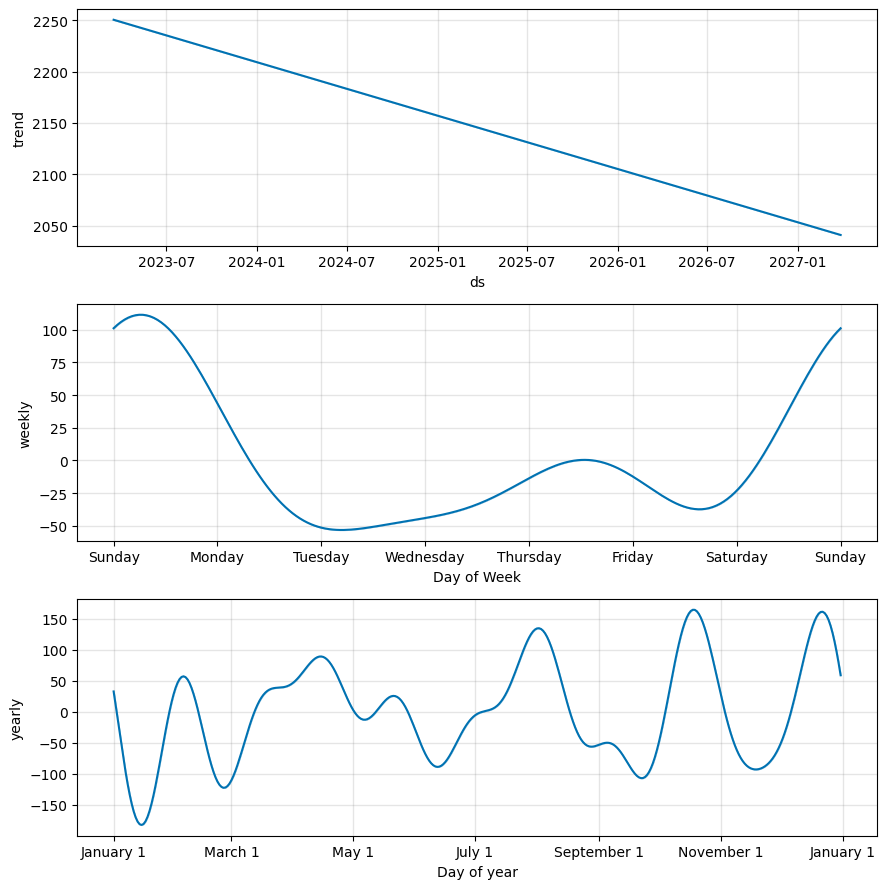

In [30]:
fig2 = model.plot_components(forecast)
plt.Figure(figsize=(12,8))
plt.show()

__Forecasting Graph__

In [114]:
df.columns

Index(['order_id', 'customer_id', 'order_date', 'order_total',
       'payment_method', 'store_id', 'customer_name', 'email', 'phone',
       'address', 'area', 'pincode', 'customer_segment', 'total_orders',
       'avg_order_value', 'season', 'Day Name', 'weeday_flag'],
      dtype='object')

C:\Users\abhip\AppData\Local\Temp\ipykernel_9488\2523721926.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_monthly = forecast.set_index("ds").resample("M").mean()
C:\Users\abhip\AppData\Local\Temp\ipykernel_9488\2523721926.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  actual_monthly = df.set_index("order_date")["order_total"].resample("M").mean()


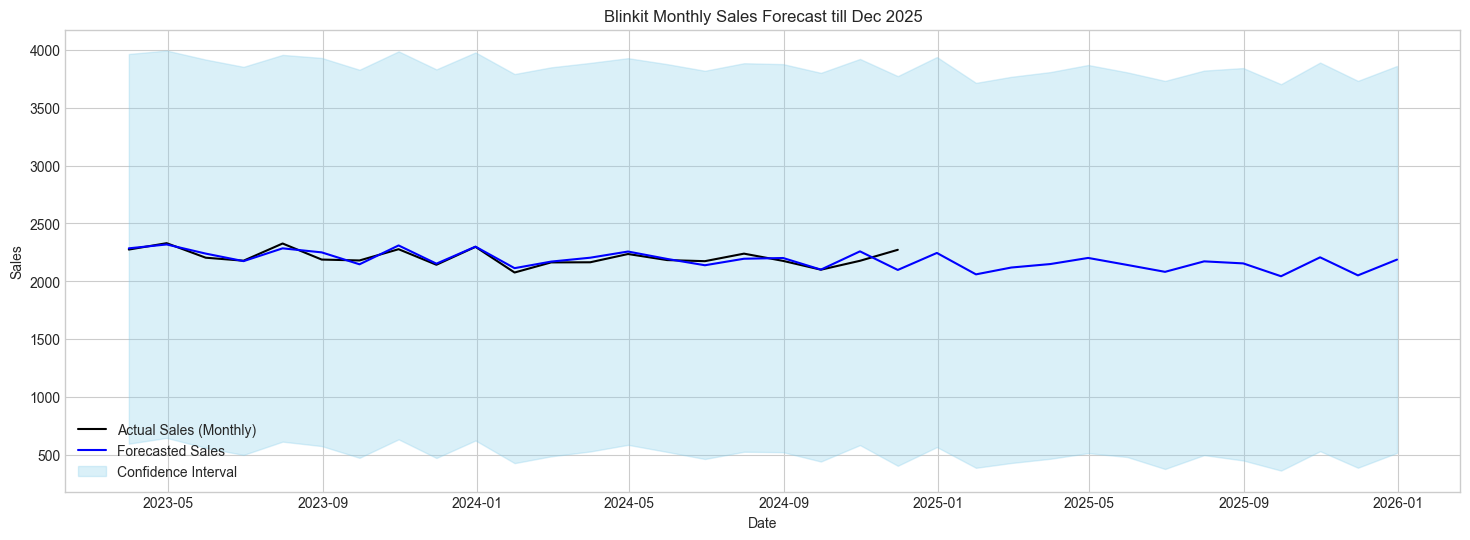

In [ ]:
import matplotlib.pyplot as plt


forecast_monthly = forecast.set_index("ds").resample("M").mean()

forecast_monthly = forecast_monthly.loc[: "2025-12"]

actual_monthly = df.set_index("order_date")["order_total"].resample("M").mean()

plt.figure(figsize=(18,6))
plt.plot(actual_monthly.index, actual_monthly.values, label="Actual Sales (Monthly)", color="black")
plt.plot(forecast_monthly.index, forecast_monthly["yhat"], label="Forecasted Sales", color="blue")
plt.fill_between(forecast_monthly.index,
                 forecast_monthly["yhat_lower"],
                 forecast_monthly["yhat_upper"],
                 color="skyblue", alpha=0.3, label="Confidence Interval")

plt.title("Blinkit Monthly Sales Forecast till Dec 2025")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()
